In [1]:
import os 
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("도시지역_인구현황_시군구__20230428114528.csv",encoding='cp949')
df_= pd.read_csv("시도·산업·종사자규모별_사업체수__종사자수_’06___20230427162816.csv",encoding='cp949')

In [3]:
df

,소재지(시군구)별(1),소재지(시군구)별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6
0,소재지(시군구)별(1),소재지(시군구)별(2),전체인구(A) (명),용도지역기준 (명),용도지역기준 (명),행정구역기준 (명),행정구역기준 (명),도시지역 인구비율 (%),도시지역 인구비율 (%)
1,행정구역별,시군구,소계,도시인구(B),비도시인구(C=A-B),도시인구(D),농촌인구(E=A-D),용도지역 인구기준(B/A*100),행정구역 인구기준(D/A*100)
2,전국,소계,51829023,47570964,4258059,47279381,4549642,91.78,91.22
3,서울특별시,소계,9668465,9668465,-,9668465,-,100,100
4,서울특별시,종로구,149384,149384,0,149384,0,100,100
...,...,...,...,...,...,...,...,...,...
244,경상남도,거창군,61502,40597,20905,40899,20603,66.01,66.5
245,경상남도,합천군,44006,25394,18612,11339,32667,57.71,25.77
246,제주특별자치도,소계,674635,611670,62965,637882,36753,90.67,94.55
247,제주특별자치도,제주시,492466,453857,38609,480020,12446,92.16,97.47


In [4]:
df_.columns=['행정구역별','산업별','종사자규모별','사업체수','종사자수']
df_.head()

,행정구역별,산업별,종사자규모별,사업체수,종사자수
0,행정구역별,산업별,종사자규모별,사업체수 (개),종사자수 (명)
1,전국,전체 산업,계,4325195,21583421
2,전국,전체 산업,1 - 4명,3587125,5699039
3,전국,전체 산업,5 - 9명,421489,2698584
4,전국,전체 산업,10 - 19명,170410,2255029


In [5]:
df_=df_.drop(0) # 0번 컬럼 버림 

In [6]:
df_=df_.replace('X','0')

In [7]:
df_=df_.reset_index(drop=True)

In [8]:
df_['산업별']=df_['산업별'].str.split('(').str[0].str.replace(',','').str.replace(' ','')
df_

,행정구역별,산업별,종사자규모별,사업체수,종사자수
0,전국,전체산업,계,4325195,21583421
1,전국,전체산업,1 - 4명,3587125,5699039
2,전국,전체산업,5 - 9명,421489,2698584
3,전국,전체산업,10 - 19명,170410,2255029
4,전국,전체산업,20 - 49명,95325,2835504
...,...,...,...,...,...
3067,제주,협회및단체수리및기타개인서비스업,5 - 9명,210,1329
3068,제주,협회및단체수리및기타개인서비스업,10 - 19명,92,1236
3069,제주,협회및단체수리및기타개인서비스업,20 - 49명,47,1302
3070,제주,협회및단체수리및기타개인서비스업,50 - 99명,6,387


In [9]:
df_ = df_.astype({'사업체수':'int','종사자수':'int'})
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역별   3072 non-null   object
 1   산업별     3072 non-null   object
 2   종사자규모별  3072 non-null   object
 3   사업체수    3072 non-null   int32 
 4   종사자수    3072 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 96.1+ KB


In [10]:
df_=df_[df_['행정구역별']!='전국']
df_

,행정구역별,산업별,종사자규모별,사업체수,종사자수
196,서울,전체산업,계,848552,5044552
197,서울,전체산업,1 - 4명,695308,1111999
198,서울,전체산업,5 - 9명,87139,556577
199,서울,전체산업,10 - 19명,36141,473817
200,서울,전체산업,20 - 49명,18015,534167
...,...,...,...,...,...
3067,제주,협회및단체수리및기타개인서비스업,5 - 9명,210,1329
3068,제주,협회및단체수리및기타개인서비스업,10 - 19명,92,1236
3069,제주,협회및단체수리및기타개인서비스업,20 - 49명,47,1302
3070,제주,협회및단체수리및기타개인서비스업,50 - 99명,6,387


In [11]:
df_=df_[df_['산업별']=='전체산업']

In [12]:
df_range=df_[df_['산업별']=='전체산업']

In [13]:
df_=df_[df_['종사자규모별']=='계']

In [14]:
df_.reset_index(inplace=True)

In [15]:
df_=df_.drop(columns=['index'])

In [16]:
df.columns

Index(['소재지(시군구)별(1)', '소재지(시군구)별(2)', '2020', '2020.1', '2020.2', '2020.3',
       '2020.4', '2020.5', '2020.6'],
      dtype='object')

In [17]:
df=df.drop(columns=['2020.1', '2020.2', '2020.3',
       '2020.4', '2020.5', '2020.6'])

In [18]:
df

,소재지(시군구)별(1),소재지(시군구)별(2),2020
0,소재지(시군구)별(1),소재지(시군구)별(2),전체인구(A) (명)
1,행정구역별,시군구,소계
2,전국,소계,51829023
3,서울특별시,소계,9668465
4,서울특별시,종로구,149384
...,...,...,...
244,경상남도,거창군,61502
245,경상남도,합천군,44006
246,제주특별자치도,소계,674635
247,제주특별자치도,제주시,492466


In [19]:
df=df.drop([0,1])


In [20]:
df.columns=['행정구역별','시군구','전체인구2020']

In [21]:
df=df.reset_index().drop(columns=['index'])

In [22]:
df_sido=df[df['시군구']=='소계']

In [23]:
df_sido=df_sido[df_sido['행정구역별']!='전국']

In [24]:
df_sido.drop(columns=['시군구'],inplace=True)

In [25]:
df_sido=df_sido.reset_index().drop(columns=['index'])


In [26]:
df_sido['행정구역별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [27]:
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
#        '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [28]:
df_sido['행정구역별']=df_sido['행정구역별'].str.split('광역시').str[0].str.split('특').str[0].str.split('도').str[0]

In [29]:
df_sido['행정구역별'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충청북',
       '충청남', '전라북', '전라남', '경상북', '경상남', '제주'], dtype=object)

In [30]:
df_sido['행정구역별']=df_sido['행정구역별'].str.replace('충청북','충북').str.replace('충청남','충남').str.replace('전라북','전북').str.replace('전라남','전남').str.replace('경상북','경북').str.replace('경상남','경남')

In [31]:
df_sido

,행정구역별,전체인구2020
0,서울,9668465
1,부산,3391946
2,대구,2418346
3,인천,2942828
4,광주,1450062
5,대전,1463882
6,울산,1136017
7,세종,355831
8,경기,13427014
9,강원,1542840


In [32]:
df_

,행정구역별,산업별,종사자규모별,사업체수,종사자수
0,서울,전체산업,계,848552,5044552
1,부산,전체산업,계,298386,1364302
2,대구,전체산업,계,214909,893590
3,인천,전체산업,계,216249,1051036
4,광주,전체산업,계,125295,582380
5,대전,전체산업,계,123728,618248
6,울산,전체산업,계,89907,493599
7,세종,전체산업,계,19821,122236
8,경기,전체산업,계,989105,5028507
9,강원,전체산업,계,150422,627833


In [33]:
df_merge=pd.merge(df_sido,df_,left_index=True,right_index=True)

In [34]:
df_merge=df_merge.astype({'전체인구2020':int})


In [35]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역별_x   17 non-null     object
 1   전체인구2020  17 non-null     int32 
 2   행정구역별_y   17 non-null     object
 3   산업별       17 non-null     object
 4   종사자규모별    17 non-null     object
 5   사업체수      17 non-null     int32 
 6   종사자수      17 non-null     int32 
dtypes: int32(3), object(4)
memory usage: 876.0+ bytes


In [36]:
df_merge['인구/사업체수']=df_merge['전체인구2020']/df_merge['사업체수']

In [37]:
df_merge['인구/종사자수']=df_merge['전체인구2020']/df_merge['종사자수']

In [38]:
df_merge

,행정구역별_x,전체인구2020,행정구역별_y,산업별,종사자규모별,사업체수,종사자수,인구/사업체수,인구/종사자수
0,서울,9668465,서울,전체산업,계,848552,5044552,11.394075,1.916615
1,부산,3391946,부산,전체산업,계,298386,1364302,11.367645,2.486213
2,대구,2418346,대구,전체산업,계,214909,893590,11.252884,2.706326
3,인천,2942828,인천,전체산업,계,216249,1051036,13.608516,2.799931
4,광주,1450062,광주,전체산업,계,125295,582380,11.573183,2.489890
5,대전,1463882,대전,전체산업,계,123728,618248,11.831453,2.367791
6,울산,1136017,울산,전체산업,계,89907,493599,12.635468,2.301498
7,세종,355831,세종,전체산업,계,19821,122236,17.952222,2.911016
8,경기,13427014,경기,전체산업,계,989105,5028507,13.574913,2.670179
9,강원,1542840,강원,전체산업,계,150422,627833,10.256744,2.457405


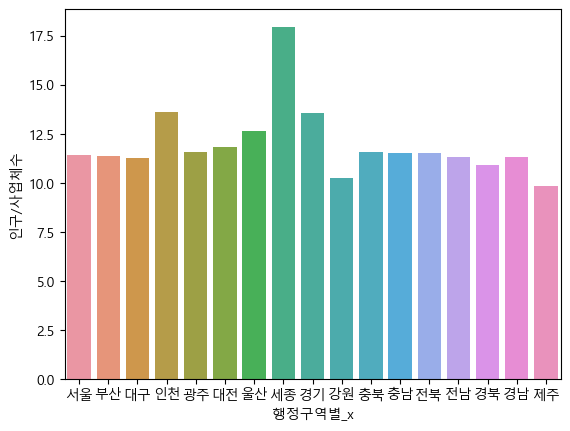

In [39]:
sns.barplot(data=df_merge, x='행정구역별_x', y='인구/사업체수')
plt.show()

In [40]:
df_

,행정구역별,산업별,종사자규모별,사업체수,종사자수
0,서울,전체산업,계,848552,5044552
1,부산,전체산업,계,298386,1364302
2,대구,전체산업,계,214909,893590
3,인천,전체산업,계,216249,1051036
4,광주,전체산업,계,125295,582380
5,대전,전체산업,계,123728,618248
6,울산,전체산업,계,89907,493599
7,세종,전체산업,계,19821,122236
8,경기,전체산업,계,989105,5028507
9,강원,전체산업,계,150422,627833


In [41]:
df_range=df_range[df_range['종사자규모별']!='계']

In [42]:
df_range

,행정구역별,산업별,종사자규모별,사업체수,종사자수
197,서울,전체산업,1 - 4명,695308,1111999
198,서울,전체산업,5 - 9명,87139,556577
199,서울,전체산업,10 - 19명,36141,473817
200,서울,전체산업,20 - 49명,18015,534167
201,서울,전체산업,50 - 99명,6521,453521
...,...,...,...,...,...
2912,제주,전체산업,50 - 99명,352,23569
2913,제주,전체산업,100 - 299명,145,23466
2914,제주,전체산업,300 - 499명,27,10149
2915,제주,전체산업,500 - 999명,7,5119


In [43]:
df_range_=df_range[(df_range['종사자규모별']!='1 - 4명') & (df_range['종사자규모별']!='5 - 9명') &
                   (df_range['종사자규모별']!='10 - 19명')& (df_range['종사자규모별']!='20 - 49명')]
df_range_


,행정구역별,산업별,종사자규모별,사업체수,종사자수
201,서울,전체산업,50 - 99명,6521,453521
202,서울,전체산업,100 - 299명,3909,632038
203,서울,전체산업,300 - 499명,738,278522
204,서울,전체산업,500 - 999명,450,310129
205,서울,전체산업,1000명 이상,331,693782
...,...,...,...,...,...
2912,제주,전체산업,50 - 99명,352,23569
2913,제주,전체산업,100 - 299명,145,23466
2914,제주,전체산업,300 - 499명,27,10149
2915,제주,전체산업,500 - 999명,7,5119


<Axes: xlabel='행정구역별', ylabel='사업체수'>

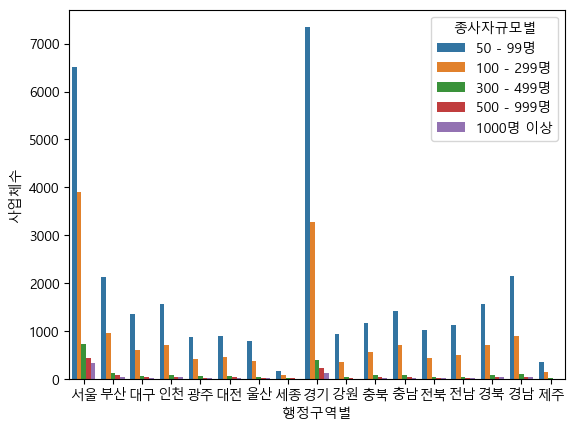

In [44]:
sns.barplot(data=df_range_,
            x="행정구역별",
            y="사업체수",
            hue="종사자규모별")

In [45]:
df_power = pd.read_csv("2020 년도 전력사용량.csv",encoding='cp949')

FileNotFoundError: [Errno 2] No such file or directory: '2020 년도 전력사용량.csv'